## Home Task Neural Network for Breast Cancer

## Import

In [2]:
# Import necessary libraries
import os
from IPython.display import Image
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


from sklearn.neural_network import MLPClassifier

# `Brest Cancer`

## `Breast Cancer Dataset Overview ` 

The **Breast Cancer Wisconsin** dataset is a commonly used dataset for binary classification, where the goal is to distinguish between **benign** and **malignant** tumors based on 30 numerical features extracted from digitized images of breast tissue.

### Dataset Summary  
- **Samples:** 569  
- **Features:** 30 (e.g., radius, texture, perimeter, area, smoothness)  
- **Classes:** 2 (Benign & Malignant)  


## Loading the Cancer Dataset

In [3]:
# Load the dataset
cancer = load_breast_cancer()
X, y, labels, feature_names = cancer.data, cancer.target, cancer.target_names, cancer.feature_names
df_cancer = pd.DataFrame(X, columns=feature_names) 
df_cancer['label'] = y

# Mapping Numeric Labels to Class Names
label_mapping = {k: v for k, v in enumerate(labels)}
df_cancer['label_names'] = df_cancer['label'].map(label_mapping)

# Display the first few rows
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label,label_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


### Shape of the dataset

In [4]:
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)
print(f"Number of features: {len(feature_names)}")
print(f"Number of samples: {X.shape[0]}")

X.shape=  (569, 30)
y.shape=  (569,)
Number of features: 30
Number of samples: 569


### Statistical Summary of the Data

In [5]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Checking Class Distribution

In [6]:
df_cancer.groupby('label_names').size()

label_names
benign       357
malignant    212
dtype: int64

### Splitting the Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Feature Scaling

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### `Neural Network Classifier`

### Multi-Layer Perceptron (MLP) Classifier  

This model is a **feedforward neural network** trained using **backpropagation**.  

#### **Model Architecture**  
- **Hidden Layers**: `(128, 64, 32)`  A deep network with **three layers**.  
- **Activation Function**: `tanh`  Helps capture complex patterns while keeping values in range (-1, 1).  
- **Optimizer**: `sgd` (Stochastic Gradient Descent) Standard approach for training neural networks.  
- **Regularization**: `alpha=0.01` L2 penalty to reduce overfitting.  
- **Training Iterations**: `max_iter=200` The model trains for **200 epochs**.  
- **Random Seed**: `random_state=0` Ensures reproducibility.  

In [ ]:
# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
# Neural Network Classifier
clf = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  
    activation='tanh',
    solver='sgd',
    max_iter=200,
    random_state=0,
    alpha=0.01,
)

# Training the model
clf.fit(X_train_scaled, y_train)

# Evaluating the model
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))
# END_CODE 

train accuracy= 98.592%
test accuracy= 97.902%


### `Plot loss curve`

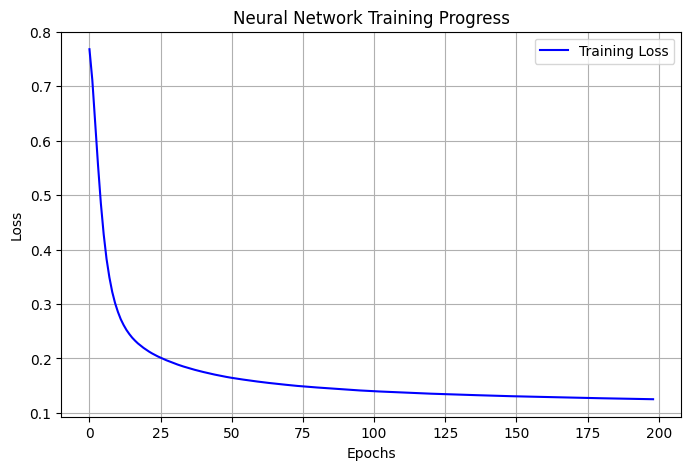

In [51]:
plt.figure(figsize=(8, 5))
plt.plot(clf.loss_curve_, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training Progress')
plt.legend()
plt.grid(True)
plt.show()

The plot shows the **training loss** decreasing over `200 epochs`, indicating that the neural network is learning effectively.  

 **Key Observations**  
- The loss **drops steeply at the beginning**, meaning the model quickly learns key patterns.  
- After ~50 epochs, the decrease **slows down**, showing the model is refining its learning.  

### `Confusion Matrix`

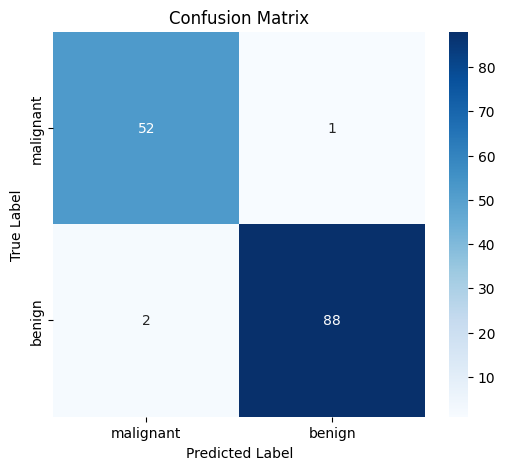

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.99      0.98      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
y_pred = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


### `Key Observations` 

- **Precision** (Positive Predictive Value):  
  - Class **0**: 96% of predicted class 0 instances were actually class 0.  
  - Class **1**: 99% of predicted class 1 instances were actually class 1.  

- **Recall** (Sensitivity / True Positive Rate):  
  - Class **0**: 98% of actual class 0 instances were correctly identified.  
  - Class **1**: 98% of actual class 1 instances were correctly identified.  

- **F1-score** (Harmonic mean of precision & recall):  
  - Class **0**: 97%  
  - Class **1**: 98%  
  - The **weighted average** F1-score is **98%**, indicating strong model performance.  

- **Overall Accuracy**:  
  The model achieved **98% accuracy**, meaning that 98% of all predictions were correct.  